# Homework 3 - Bernardo Ribeiro

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import time

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

170498071/170498071 [==============================] - 2s 0us/step


In [13]:
# Accuracy went from 58.06% to 80.61%

class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.conv_2 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.2)
        self.conv_5 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.conv_6 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.pool_7 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_8 = tf.keras.layers.Dropout(0.2)
        self.conv_9 = tf.keras.layers.Conv2D(128, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.conv_10 = tf.keras.layers.Conv2D(128, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.pool_11 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_12 = tf.keras.layers.Dropout(0.2)
        self.dense_13 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_14 = tf.keras.layers.Dropout(0.2)
        self.dense_15 = tf.keras.layers.Dense(10, activation='softmax')
        

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        
        x = self.conv_5(x)
        x = self.conv_6(x)
        x = self.pool_7(x)
        x = self.drop_8(x)
        
        
        x = self.conv_9(x)
        x = self.conv_10(x)
        x = self.pool_11(x)
        x = self.drop_12(x)
        
        
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_13(x)
        x = self.drop_14(x)
        x = self.dense_15(x)

        return x

In [14]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [15]:
batch_size = 128
epochs = 10
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/10
391/391 [==============================] - 15s 7ms/step - loss: 1.8076 - accuracy: 0.3343
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.3067 - accuracy: 0.5268
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 1.0754 - accuracy: 0.6184
Epoch 4/10
391/391 [==============================] - 2s 4ms/step - loss: 0.9144 - accuracy: 0.6782
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 0.8106 - accuracy: 0.7160
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 0.7376 - accuracy: 0.7417
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6754 - accuracy: 0.7648
Epoch 8/10
391/391 [==============================] - 2s 5ms/step - loss: 0.6228 - accuracy: 0.7825
Epoch 9/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5835 - accuracy: 0.7979
Epoch 10/10
391/391 [==============================] - 2s 5ms/step - loss: 0.5527 - accuracy: 0.806

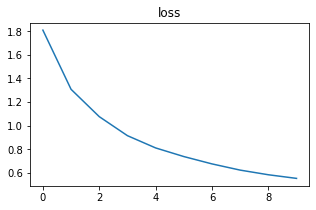

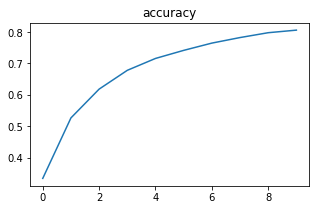

In [16]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [17]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 3s - loss: 0.6189 - accuracy: 0.7948 - 3s/epoch - 10ms/step
accuracy: 79.48%
CPU times: user 1.36 s, sys: 2.18 s, total: 3.54 s
Wall time: 9.15 s
